<a href="https://colab.research.google.com/github/catabia/indeed/blob/main/state_comparisons_9_9_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
import seaborn as sns
import numpy as np
import math
from matplotlib import dates

#pandas!
pd.set_option('display.max_rows', 500) 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# The entire reveiw set...

data = pd.read_csv("/content/drive/MyDrive/hannah_research/data/indeed_08_03_21.txt", sep ='\t')

#dates!
data['review_date'] = pd.to_datetime(data['review_date'])
data.set_index(pd.DatetimeIndex(data['review_date']))

data.shape

(2400712, 47)

In [4]:
# Only looking at Washington state, Oregon, Illinois, Maryland at the moment

df = data[data.state.isin(['WA', 'OR', 'IL', 'MD', 'VA', 'DC'])]
df.shape

(271592, 47)

In [5]:
mw = pd.read_csv("/content/drive/MyDrive/hannah_research/data/minimum_wages.csv")

#dates!
mw['date'] = pd.to_datetime(mw['date'])
mw.set_index(pd.DatetimeIndex(mw['date']))


,date,washington_state,seattle_large_medical,seattle_large_NO_medical,oregon_standard,portland_urban_growth_boundary,oregon_nonurban,illinois,chicago_large,cook_il,maryland,montgomery_md_large,prince_george_md,washington_dc,virginia
date,,,,,,,,,,,,,,,
2012-01-01,2012-01-01,9.04,9.04,9.04,8.80,8.80,8.80,8.25,8.25,8.25,7.25,7.25,7.25,8.25,7.25
2012-02-01,2012-02-01,9.04,9.04,9.04,8.80,8.80,8.80,8.25,8.25,8.25,7.25,7.25,7.25,8.25,7.25
2012-03-01,2012-03-01,9.04,9.04,9.04,8.80,8.80,8.80,8.25,8.25,8.25,7.25,7.25,7.25,8.25,7.25
2012-04-01,2012-04-01,9.04,9.04,9.04,8.80,8.80,8.80,8.25,8.25,8.25,7.25,7.25,7.25,8.25,7.25
2012-05-01,2012-05-01,9.04,9.04,9.04,8.80,8.80,8.80,8.25,8.25,8.25,7.25,7.25,7.25,8.25,7.25
2012-06-01,2012-06-01,9.04,9.04,9.04,8.80,8.80,8.80,8.25,8.25,8.25,7.25,7.25,7.25,8.25,7.25
2012-07-01,2012-07-01,9.04,9.04,9.04,8.80,8.80,8.80,8.25,8.25,8.25,7.25,7.25,7.25,8.25,7.25
2012-08-01,2012-08-01,9.04,9.04,9.04,8.80,8.80,8.80,8.25,8.25,8.25,7.25,7.25,7.25,8.25,7.25
2012-09-01,2012-09-01,9.04,9.04,9.04,8.80,8.80,8.80,8.25,8.25,8.25,7.25,7.25,7.25,8.25,7.25


## **Minimum wage changes**

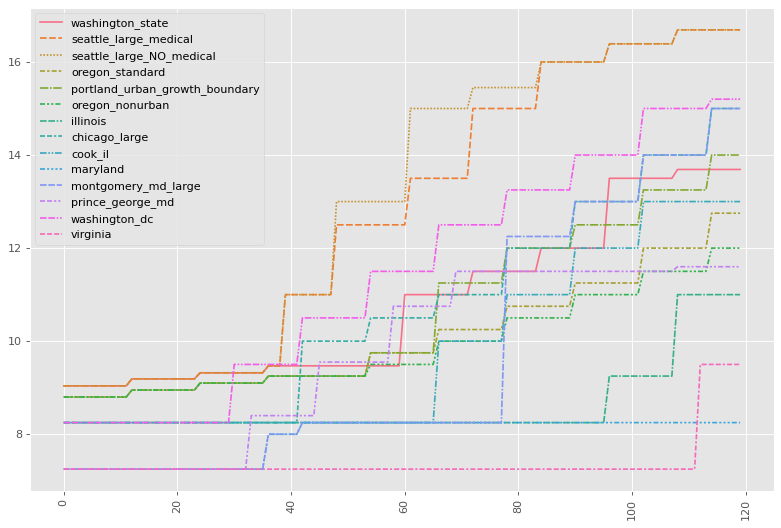

In [6]:
figure(figsize=(12, 8), dpi=80)
sns.lineplot(data=mw)
plt.tick_params(axis='x', rotation=90)

### Washington State & Seattle

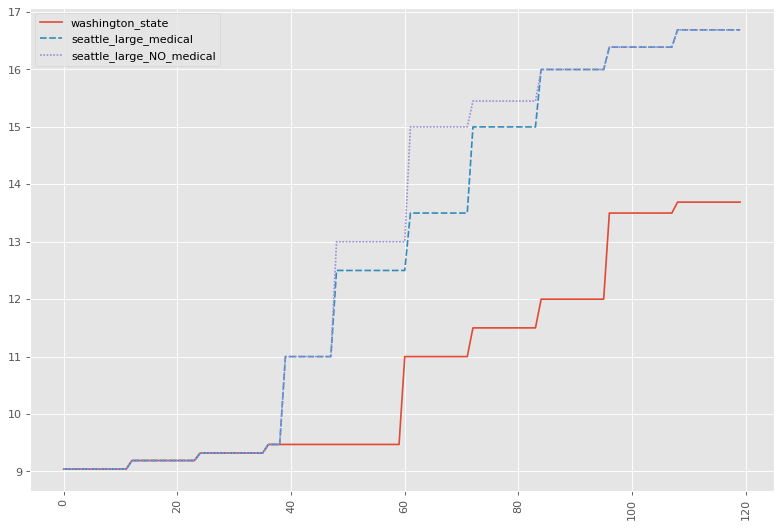

In [7]:
figure(figsize=(12, 8), dpi=80)
sns.lineplot(data=mw[['date', 'washington_state', 'seattle_large_medical', 'seattle_large_NO_medical']])
plt.tick_params(axis='x', rotation=90)

### Oregon and the Portland Urban Growth Boundary

Washington state is included because Portland is right on the border of Washington, and the greater metro area around Portland includes many cities in Washington.  Indeed, it appears as the though the PUGB minimum wage is trying to "keep pace" with the Washington State minimum wage.

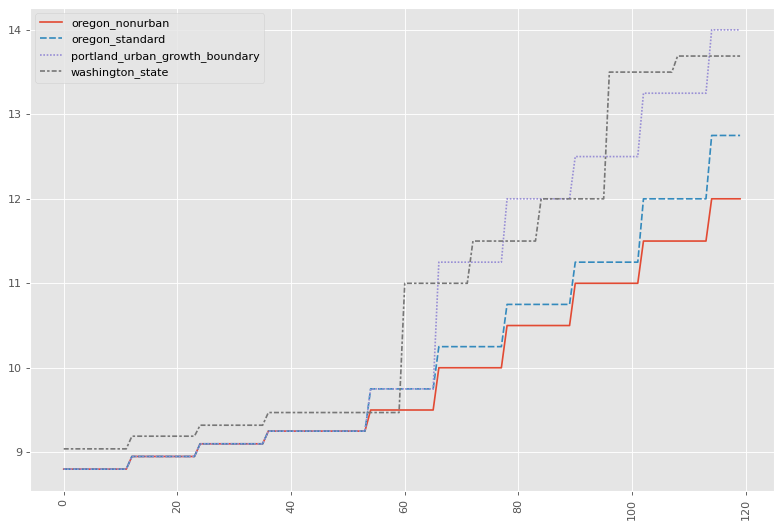

In [8]:
figure(figsize=(12, 8), dpi=80)
sns.lineplot(data=mw[['date', 'oregon_nonurban', 'oregon_standard', 'portland_urban_growth_boundary', 'washington_state']])
plt.tick_params(axis='x', rotation=90)

### Chicago, Cook County, and the rest of Illinois

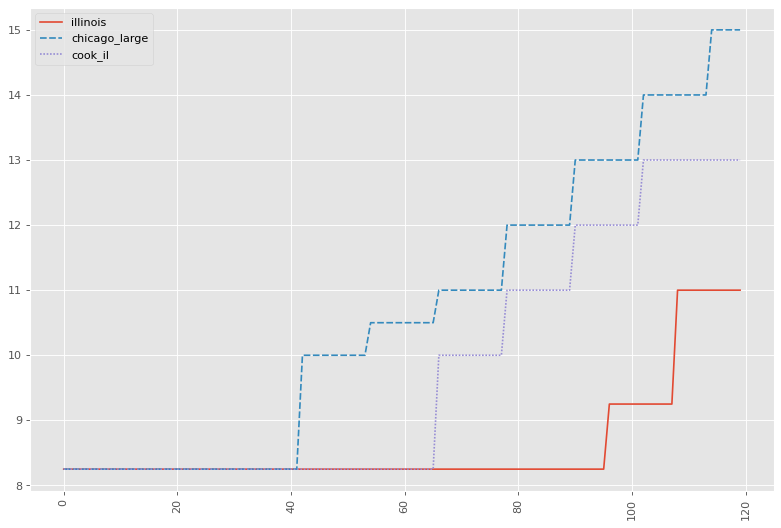

In [9]:
figure(figsize=(12, 8), dpi=80)
sns.lineplot(data=mw[['date', 'illinois', 'chicago_large', 'cook_il']])
plt.tick_params(axis='x', rotation=90)

### Maryland and the areas surrounding Washington, D.C.
Montgomery and Prince George's counties, which are part of the D.C. metropolitain area, have higher minimum wages compared to the rest of Maryland.  Virginia mininmum wage is also included because of its proximity to D.C.  Interesting to consider the differences between minimum wages in Baltimore and D.C., which are arguably both part of the same large metro area.

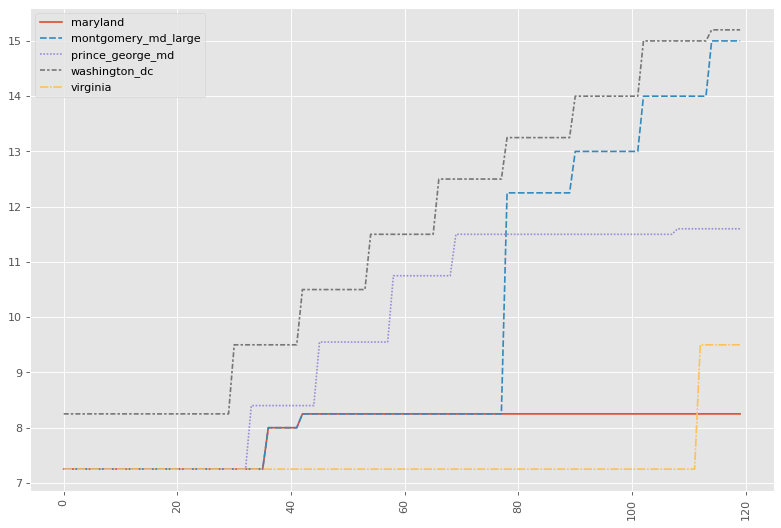

In [10]:
figure(figsize=(12, 8), dpi=80)
sns.lineplot(data=mw[['date', 'maryland', 'montgomery_md_large', 'prince_george_md', 'washington_dc', 'virginia']])
plt.tick_params(axis='x', rotation=90)

### Comparison of increase differentials: Washington, Oregon, Illinois


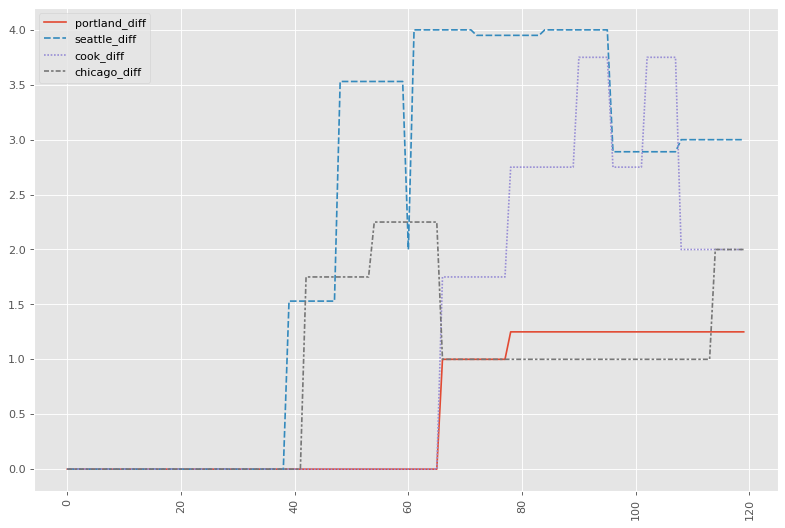

In [11]:
figure(figsize=(12, 8), dpi=80)
mw['portland_diff'] = mw.portland_urban_growth_boundary - mw.oregon_standard
mw['seattle_diff'] = mw.seattle_large_NO_medical - mw.washington_state
mw['cook_diff'] = mw.cook_il - mw.illinois
mw['chicago_diff'] = mw.chicago_large - mw.cook_il
sns.lineplot(data=mw[['date', 'portland_diff', 'seattle_diff', 'cook_diff', 'chicago_diff']])
plt.tick_params(axis='x', rotation=90)

### **Useful code: labels for each region**


In [12]:
# districts
seattle = ['Seattle', 'North Seattle', 'Northgate', 'Lake City', 'North Seattle',
                'Windermere', 'Ravenna', 'University District', 'Lake Union', 'Lower Wallingford',
                'Fremont', 'Ballard', 'Central Seattle', 'Magnolia', 'Queen Anne', 'Capitol Hill',
                'Broadway', 'Stevens', 'Madison Park', 'South Lake Union', 'Central Area', 'Atlantic',
                'Madrona', 'Harrison', 'Denny-Blaine', 'South End', 'Rainier Valley', 'Columbia City',
                'Seward Park', 'Beacon Hill', 'West Seattle', 'Delridge', 'Georgetown', 'Southeast Seattle']

pugb = ['Portland', 'Forest Grove', 'Cornelius', 'Hillsboro', 'Beaverton', 'Sherwood', 'King City', 'Tigard', 'Tualatin',
             'Wilsonville', 'Durham', 'River Grove', 'Lake Oswego', 'West Linn', 'Oregon City', 'Gladstone', 'Happy Valley',
             'Johnson City', 'Milwaukie', 'Gresham', 'Fairview', 'Wood Village', 'Troutdale', 'Maywood Park']

chicago = list(set(['Chicago','Old Town Triangle', 'Fernwood', 'Wildwood', 'Wentworth Gardens', 'Jackowo', 'Clearing', 'Mount Greenwood', 
           'Tri-Taylor', 'Albany Park', 'Roseland', 'Belmont Terrace', 'South Lawndale', 'Parkview', 'Forest Glen', 
           'Roscoe Village', 'South Commons', 'Wicker Park', 'Cragin', 'Near North Side', 'Schorsch Village', 'Kensington', 
           'Buena Park', 'Austin, Humboldt Park', 'Big Oaks', 'Longwood Manor', 'Galewood', 'Lake Meadows', 
           'Wrightwood Neighbors', 'Chatham, Roseland', 'Old Irving Park', 'Near West Side', 'Lithuanian Plaza', 
           'Prairie Shores', 'Cabrini–Green', 'Canaryville', 'Margate Park', 'Lincoln Park', 'East Chatham', 
           'Greektown', 'Arcadia Terrace', 'Museum Campus', 'South Edgebrook', 'Belmont Cragin', 'Woodlawn', 'Lilydale', 
           'Chicago Lawn', 'Old Town', 'Morgan Park', 'Chrysler Village', 'Portage Park', 'Montclare', 'North Lawndale', 
            'Smith Park', 'West Woodlawn', 'Wrightwood', 'West Morgan Park', 'Ravenswood', 'East Pilsen', 
           'Douglas', 'Old Norwood', 'The Gap', 'Bowmanville', 'The Island', 'Sheridan Park', 'Oakland', 'South Shore', 
           'Lakewood', 'Balmoral', 'West Loop', 'Garfield Ridge', 'Sleepy Hollow', 'Vittum Park', 'Grand Boulevard', 
           'Lake View', 'Humboldt Park', 'Ford City', 'Hanson Park', 'Back of the Yards', 'Douglas Park', 'Irving Park', 
           'Gold Coast', 'Kosciuszko Park', 'West Rogers Park', 'Hollywood Park', 'Logan Square', 'Park West', 'Bridgeport',
           'West Lawn', 'Little Village', 'Dearborn Homes', 'Grand Crossing', 'Pill Hill', 'Polish Downtown', "River's Edge",
           'Lakeview', 'Edgewater Glen', 'East Garfield Park', 'West Pullman', 'Magnificent Mile', 'LeClaire Courts', 
           'Eden Green', 'Near South Side', 'Washington Heights', 'West Chatham', 'Fuller Park', 'Edgewater', 'Washington Park', 
           'North Halsted', 'Gage Park', 'Ashburn', 'Golden Gate', 'McKinley Park', 'North Austin', 'Clearing West', 
           'Pullman', 'Belmont Gardens', 'Rogers Park', 'Gresham', 'Nortown', 'Lower West Side', 'East Beverly', 'Edgebrook', 
           'Englewood', 'Stony Island Park', 'Clarendon Park', 'North Center', 'Ravenswood Gardens', 'Ravenswood Manor', 
           'Andersonville', 'South Chicago', 'Graceland West', 'Hermosa', 'West Town', 'Hamilton Park', 'Archer Heights', 
           'South Loop', 'Greater Grand Crossing', 'Streeterville', 'Crestline', 'Ashburn Estates', 'New Chinatown', 
           'South Deering', 'Fulton River District', 'Dunning', 'Ranch Triangle', 'Old Edgebrook', 'University Village', 
           'Kenwood', 'Kilbourn Park', 'Marquette Park', 'Beverly View', 'Burnside', 'Marshall Square', 'Fifth City', 
           'Park Manor', 'Auburn Gresham', 'River North', 'Beverly Woods', 'Brickyard', 'K-Town', "Printer's Row", 
           'North Mayfair', 'Little Italy', 'Sheffield Neighbors', 'Homan Square', 'Austin', 'Uptown', 'East Hyde Park',
           'Chinatown', 'Irving Woods', 'Wacławowo', 'Cottage Grove Heights', 'Belmont Central',  'Bronzeville', 
           'Avalon Park', 'Goose Island', 'The Loop', 'Oriole Park', 'River West', "Talley's Corner", 'The Villa', 
           'East Side', "St. Ben's", 'Altgeld Gardens', 'West Englewood', 'Hegewisch', 'Pilsen', 'Avondale', 
           'North Kenwood', 'Bucktown', 'Jefferson Park', 'West Chesterfield', 'West Garfield Park', 'South East Ravenswood', 
           'Ukrainian Village', 'Prairie Avenue Historic District', 'Clearing East', 'Beverly', 'New Eastside', 
           'Princeton Park', 'Scottsdale', 'Stateway Gardens', 'Polish Village', 'Belmont Heights', 'Dearborn Park', 
           'Kelvyn Park', 'Noble Square', 'Pulaski Park', 'West Humboldt Park', 'Kennedy Park', 'Sauganash', 
           'Merchant Park', 'Armour Square', 'Calumet Heights', 'Norwood Park West', 'East Village', 
           'Avondale Gardens', 'Groveland Park', 'Hyde Park', 'Avondale, Irving Park', 'Brighton Park', 'West Beverly', 
           'North Park', 'South Austin', 'Mayfair', 'Rosemoor', 'New City', 'Edison Park', 'Illinois Medical District',
           'Wrigleyville', 'Sheridan Station Corridor', 'Legends South', 'Northalsted "Boystown"', 'West Town', 
           'Logan Square', 'Heart of Chicago', "O'Hare", 'Peterson Park', 'Brainerd', 'Jackson Park Highlands',
           'West Elsdon', 'Union Ridge', 'Chatham', 'Rosehill', 'Central Station', 'Marynook', 'Norwood Park East', 
           'West DePaul', 'Lakeview', 'Palmer Square', 'Gladstone Park', 'Schorsch Forest View', 'Edgewater Beach', 
           'West Ridge', 'Loyola', 'Lincoln Square', 'Budlong Woods']))

cook = list(set(['Berwyn','Blue Island','Burbank','Calumet City','Chicago Heights','Country Club Hills','Countryside','Des Plaines','Elgin','Evanston','Harvey','Hickory Hills','Hometown',
'Markham','Northlake','Oak Forest','Orland Park','Palos Heights','Palos Hills','Palos Park','Park Ridge','Prospect Heights','Rolling Meadows','Cicero','Thornton','Wheeling',
'Worth','Proviso','Maine','Schaumburg','Palatine','Lyons','Bremen','Niles','Hanover','Orland','Elk Grove','Leyden','Bloom','Northfield','Rich','Berwyn','New Trier','Palos',
'Oak Park','Stickney','Norwood Park','Lemont','Calumet','Barrington','Riverside','River Forest','Alsip','Arlington Heights','Barrington Hills','Bedford Park','Bellwood','Berkeley',
'Bridgeview','Broadview','Brookfield','Burnham','Calumet Park','Chicago Ridge','Crestwood','Dixmoor','Dolton','East Hazel Crest','Elk Grove Village','Elmwood Park','Evergreen Park',
'Flossmoor','Ford Heights','Forest Park','Forest View','Franklin Park','Glencoe','Glenview','Glenwood','Golf','Harwood Heights','Hazel Crest','Hillside','Hinsdale','Hodgkins',
'Hoffman Estates','Homewood','Indian Head Park','Inverness','Justice','Kenilworth','La Grange','La Grange Park','Lansing','Lemont','Lincolnwood','Lynwood','Lyons','Matteson',
'Maywood','McCook','Melrose Park','Merrionette Park','Midlothian','Morton Grove','Mount Prospect','Niles','Norridge','North Riverside','Northbrook','Northfield','Oak Forest',
'Oak Lawn','Oak Park','Olympia Fields','Orland Hills','Orland Park','Palos Park','Park Forest','Phoenix','Posen','Richton Park','River Forest','River Grove', 'Riverdale','Riverside',
'Robbins','Roselle','Rosemont','Sauk Village','Schaumburg','Schiller Park','Skokie','South Barrington','South Chicago Heights','South Holland','Steger','Stickney','Stone Park',
'Streamwood','Summit','Thornton','Tinley Park','University Park','Westchester','Western Springs','Wheeling','Willow Springs','Wilmette','Winnetka','Worth']))

montgomery = [ 'Ashton','Barnesville','Beallsville','Bethesda','Boyds','Brinklow','Brookeville','Burtonsville','Cabin John','Chevy Chase','Clarksburg','Damascus',
'Derwood','Dickerson','Gaithersburg','Garrett Park','Germantown','Glen Echo','Kensington','Montgomery Village','Olney','Poolesville','Potomac','Rockville',
'Sandy Spring','Silver Spring','Spencerville','Takoma Park','Washington Groves']


prince_georges =  ['Berwyn Heights', 'Bladensburg', 'Bowie', 'Brentwood', 'Capitol Heights', 'Cheverly', 'College Park', 'Colmar Manor', 'Cottage City', 
                   'District Heights', 'Eagle Harbor', 'Edmonston', 'Fairmount Heights', 'Forest Heights', 'Glenarden', 'Greenbelt', 'Hyattsville', 
                   'Landover Hills', 'Laurel', 'Morningside', 'Mount Rainier', 'New Carrollton', 'North Brentwood', 'Riverdale Park', 'Seat Pleasant', 
                   'University Park', 'Upper Marlboro']


In [13]:
'''
#INDICATORS

# columns of zeros
cols = ['seattle_large', 'washington_state',
        'portland_urban_growth_boundary', 'oregon_standard_nonurban',
        'chicago_large', 'cook_il', 'illinois',
        'prince_georges_md', 'montgomery_md_large', 'maryland',
        'washington_dc', 'virginia']

for col in cols:
  df[col] = 0

# washington state
df.loc[(df.state=='WA') & (df.city.isin(seattle)), 'seattle_large']=1
df.loc[(df.state=='WA') & (~df.city.isin(seattle)), 'washington_state']=1

# oregon
df.loc[(df.state=='OR') & (df.city.isin(pugb)), 'portland_urban_growth_boundary']=1
df.loc[(df.state=='OR') & (~df.city.isin(pugb)), 'oregon_standard_nonurban']=1

# illinois
df.loc[(df.state=='IL') & (df.city.isin(chicago)), 'chicago_large']=1
df.loc[(df.state=='IL') & (df.city.isin(cook)), 'cook_il']=1
df.loc[(df.state=='IL') & (~df.city.isin(chicago) & (~df.city.isin(cook))), 'illinois']=1

# maryland
df.loc[(df.state=='MD') & (df.city.isin(prince_georges)), 'prince_georges_md']=1
df.loc[(df.state=='MD') & (df.city.isin(montgomery)), 'montgomery_md_large']=1
df.loc[(df.state=='MD') & (~df.city.isin(montgomery) & (~df.city.isin(prince_georges))), 'maryland']=1

# washgington, d.c.
df.loc[df.state=='DC', 'washington_dc']=1

# virginia
df.loc[df.state=='VA', 'virginia']=1

'''

# LABELS

# washington state
df.loc[(df.state=='WA') & (df.city.isin(seattle)), 'mw_region']='seattle_large'
df.loc[(df.state=='WA') & (~df.city.isin(seattle)), 'mw_region']='washington_state'

# oregon
df.loc[(df.state=='OR') & (df.city.isin(pugb)), 'mw_region']= 'portland_urban_growth_boundary'
df.loc[(df.state=='OR') & (~df.city.isin(pugb)), 'mw_region']='oregon_standard_nonurban'

# illinois
df.loc[(df.state=='IL') & (df.city.isin(chicago)), 'mw_region']='chicago_large'
df.loc[(df.state=='IL') & (df.city.isin(cook)), 'mw_region']='cook_il'
df.loc[(df.state=='IL') & (~df.city.isin(chicago) & (~df.city.isin(cook))), 'mw_region']='illinois'

# maryland
df.loc[(df.state=='MD') & (df.city.isin(prince_georges)), 'mw_region']='prince_georges_md'
df.loc[(df.state=='MD') & (df.city.isin(montgomery)), 'mw_region']='montgomery_md_large'
df.loc[(df.state=='MD') & (~df.city.isin(montgomery) & (~df.city.isin(prince_georges))), 'mw_region']='maryland'

# washgington, d.c.
df.loc[df.state=='DC', 'mw_region']='washington_dc'

# virginia
df.loc[df.state=='VA', 'mw_region']='virginia'

df.mw_region

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


10         oregon_standard_nonurban
12                         illinois
18                    chicago_large
22                 washington_state
23                         virginia
                     ...           
2400675                    maryland
2400679                    virginia
2400699            washington_state
2400700         montgomery_md_large
2400701               chicago_large
Name: mw_region, Length: 271592, dtype: object

## **Number of reviews by state/region**

In [14]:
df['month_year'] = pd.to_datetime(df['review_date']).dt.strftime('%Y-%m')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### All states



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


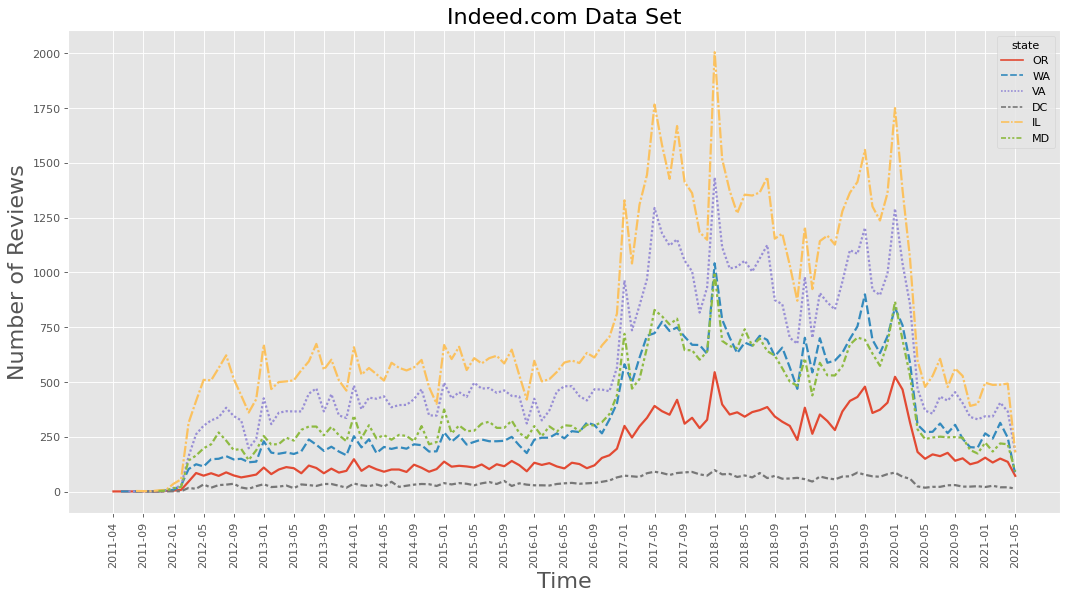

In [15]:
data_viz = df[['month_year', 'state']]
data_viz = data_viz.groupby(['month_year', 'state']).size().reset_index(name='count')

figure(figsize=(16, 8), dpi=80)
sns.lineplot(data=data_viz, x='month_year', y='count', hue = 'state', linewidth=2, style = 'state')
plt.title("Indeed.com Data Set", fontsize=20)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Number of Reviews', fontsize=20)

ax = plt.axes()
ax.set_xticks(ax.get_xticks()[::4])

plt.tick_params(axis='x', rotation=90)

### Washington state


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


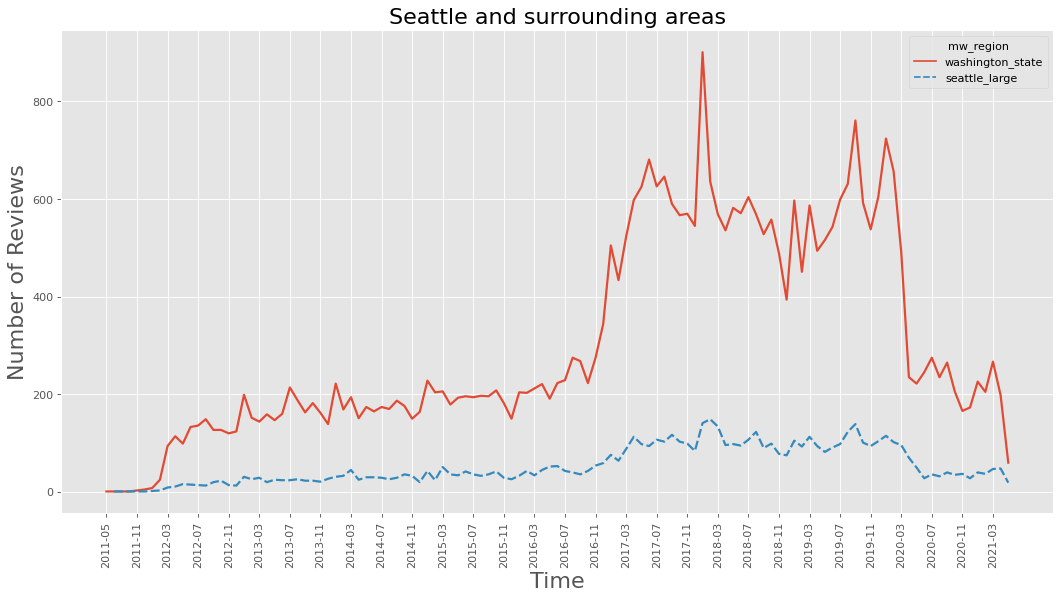

In [16]:
state_viz = df[df.state=='WA']
state_viz = state_viz[['month_year', 'mw_region']]
state_viz = state_viz.groupby(['month_year', 'mw_region']).size().reset_index(name='count')

figure(figsize=(16, 8), dpi=80)
sns.lineplot(data=state_viz, x='month_year', y='count', hue = 'mw_region', linewidth=2, style = 'mw_region')
plt.title("Seattle and surrounding areas", fontsize=20)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Number of Reviews', fontsize=20)

ax = plt.axes()
ax.set_xticks(ax.get_xticks()[::4])

plt.tick_params(axis='x', rotation=90)

### Oregon

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


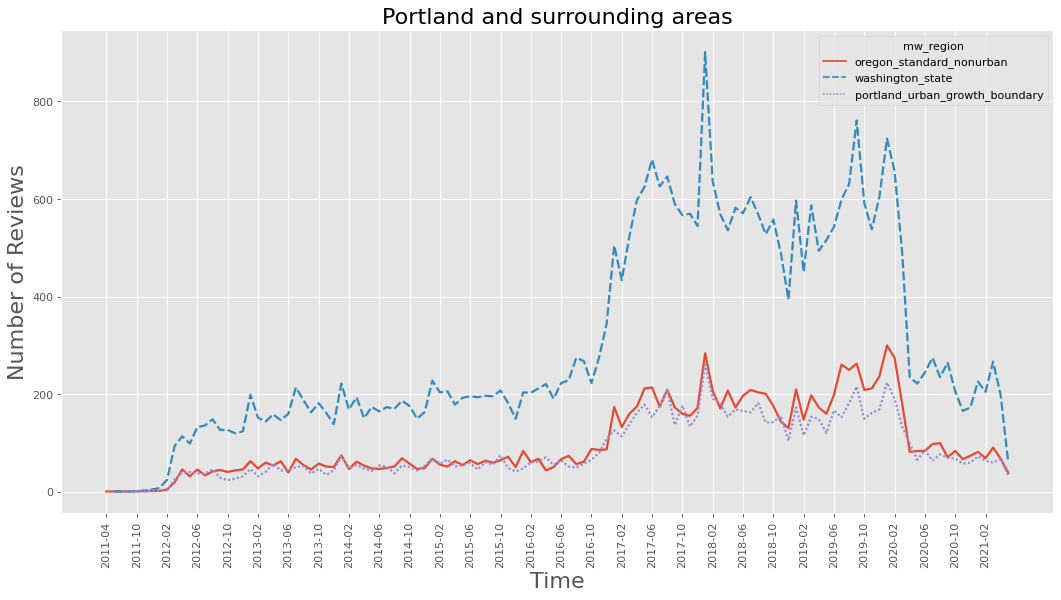

In [17]:
or_viz = df[df.state=='OR']
wa_viz = df[df.mw_region=='washington_state']
state_viz = pd.concat([or_viz, wa_viz])
state_viz = state_viz[['month_year', 'mw_region']]
state_viz = state_viz.groupby(['month_year', 'mw_region']).size().reset_index(name='count')

figure(figsize=(16, 8), dpi=80)
sns.lineplot(data=state_viz, x='month_year', y='count', hue = 'mw_region', linewidth=2, style = 'mw_region')
plt.title("Portland and surrounding areas", fontsize=20)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Number of Reviews', fontsize=20)

ax = plt.axes()
ax.set_xticks(ax.get_xticks()[::4])

plt.tick_params(axis='x', rotation=90)

### Illinois

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


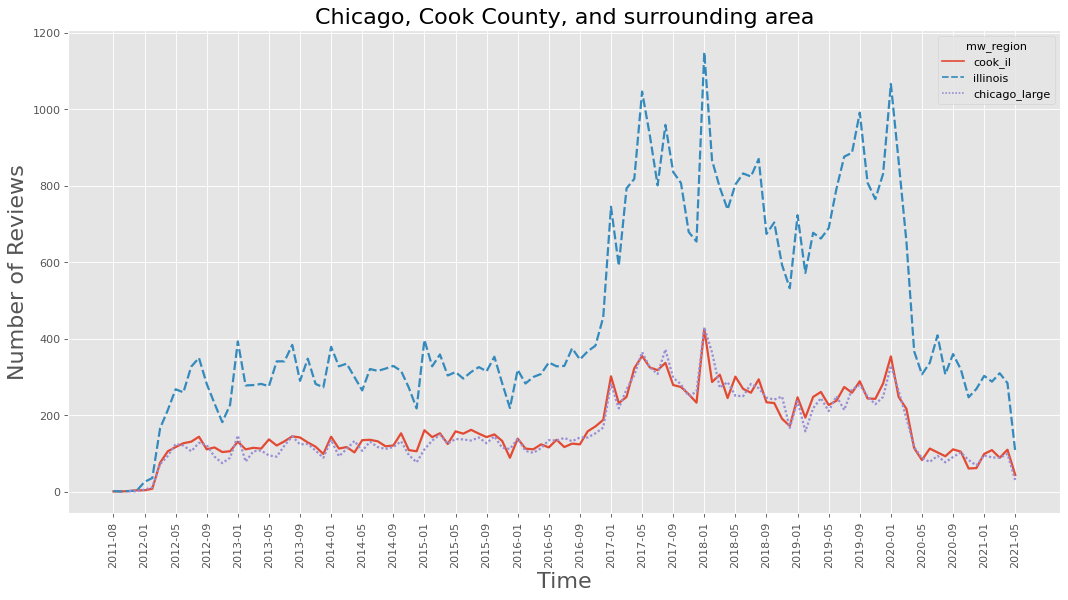

In [18]:
state_viz = df[df.state=='IL']
state_viz = state_viz[['month_year', 'mw_region']]
state_viz = state_viz.groupby(['month_year', 'mw_region']).size().reset_index(name='count')

figure(figsize=(16, 8), dpi=80)
sns.lineplot(data=state_viz, x='month_year', y='count', hue = 'mw_region', linewidth=2, style = 'mw_region')
plt.title("Chicago, Cook County, and surrounding area", fontsize=20)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Number of Reviews', fontsize=20)

ax = plt.axes()
ax.set_xticks(ax.get_xticks()[::4])

plt.tick_params(axis='x', rotation=90)

### Maryland / Washington, D.C.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


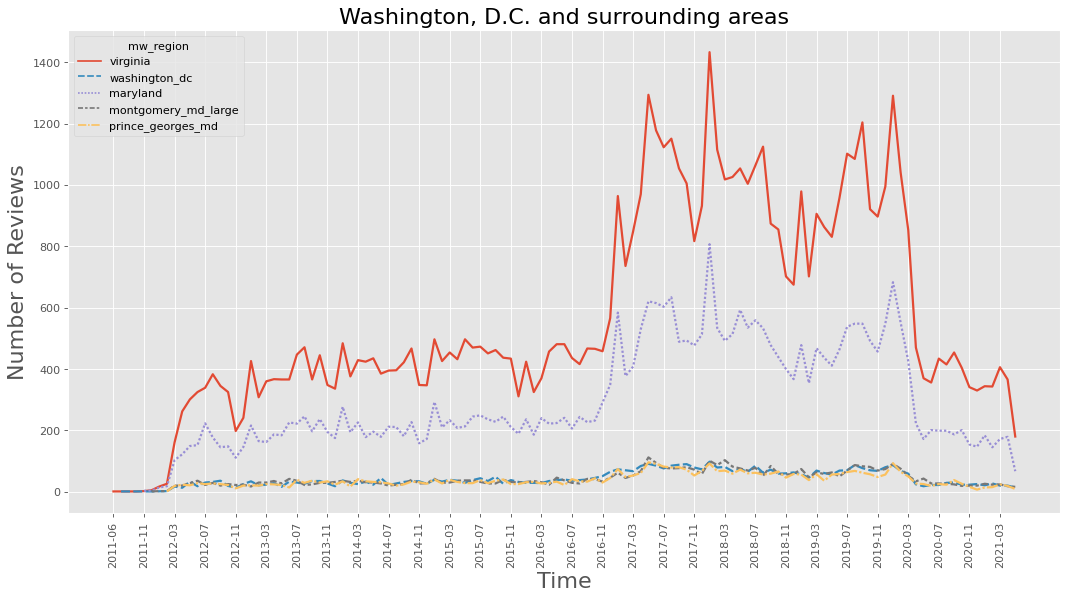

In [19]:
state_viz = df[df.state.isin(['MD', 'VA', 'DC'])]
state_viz = state_viz[['month_year', 'mw_region']]
state_viz = state_viz.groupby(['month_year', 'mw_region']).size().reset_index(name='count')

figure(figsize=(16, 8), dpi=80)



sns.lineplot(data=state_viz, x='month_year', y='count', hue = 'mw_region', linewidth=2, style = 'mw_region')
plt.title("Washington, D.C. and surrounding areas", fontsize=20)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Number of Reviews', fontsize=20)

ax = plt.axes()
ax.set_xticks(ax.get_xticks()[::4])

plt.tick_params(axis='x', rotation=90)

## **Top companies**

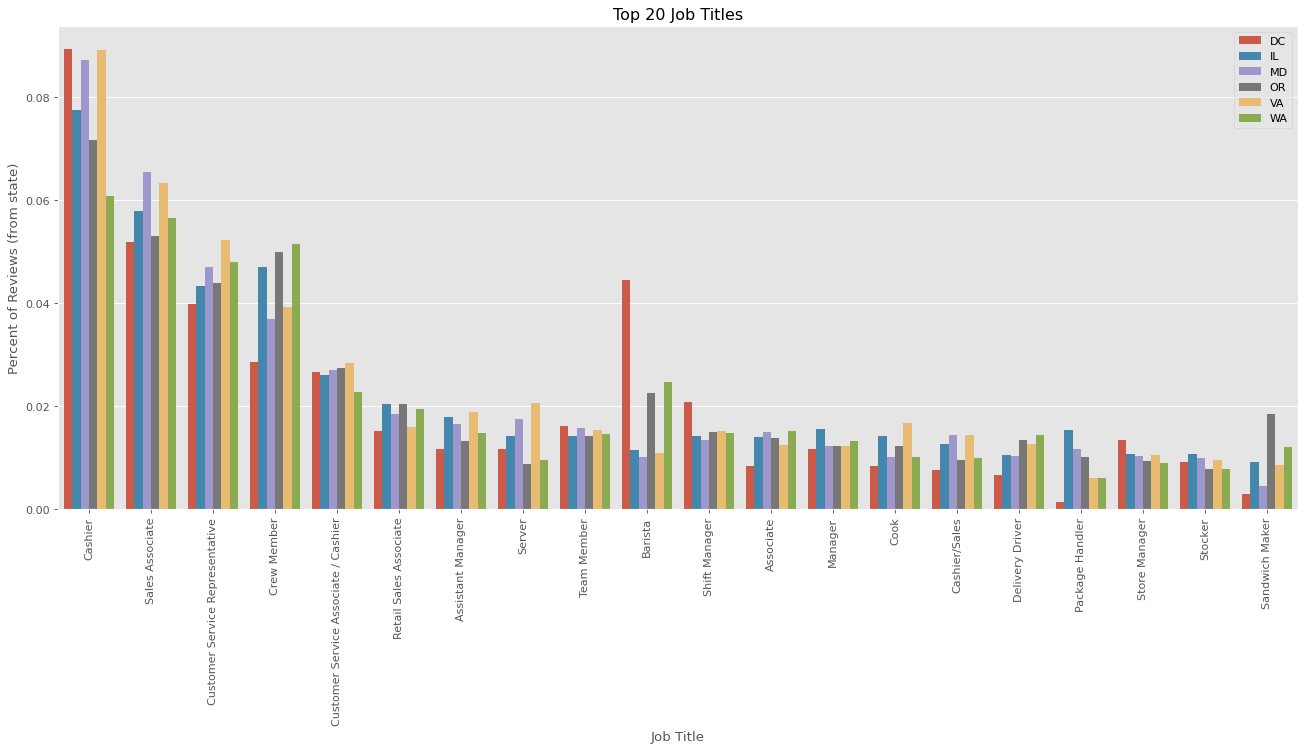

In [75]:
figure(figsize=(20,8), dpi=80)
top_jobs = df.norm_job_title.value_counts(normalize=True)[:20].index.tolist()
job_df = df[df.norm_job_title.isin(top_jobs)]


# number of reviews by region and job title
perc = job_df.groupby('state')['norm_job_title'].value_counts().astype(float)

# number of reviews in each region
total = df.state.value_counts().astype(float)

# divide by totals in region
for region in total.axes[0].tolist():
  for job in top_jobs:
    perc[region][job] = perc[region][job]/total[region]


# undo multi-indexing
perc = perc.to_frame()
perc = perc.rename(columns={'norm_job_title':'percentage'})
perc = perc.reset_index()
#print(perc)

sns.barplot(data=perc, x='norm_job_title',y='percentage', hue = 'state', order = top_jobs)
#sns.countplot(data=job_df, x='norm_job_title', hue = 'state', order = top_jobs)
plt.title("Top 20 Job Titles")
plt.xlabel('Job Title')
locs, labs = plt.xticks()
plt.xticks(ticks=locs, rotation=90)
plt.ylabel('Percent of Reviews (from state)')
plt.legend()

### Seattle area

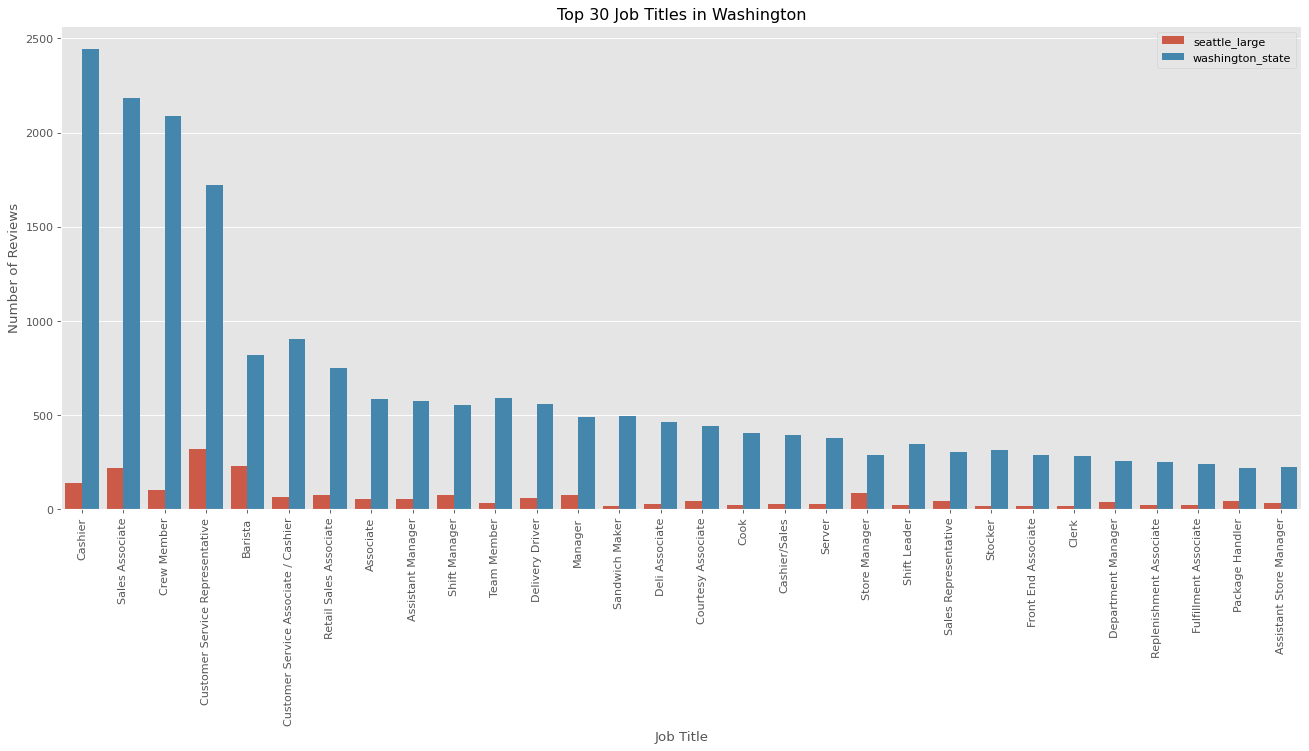

In [21]:
figure(figsize=(20,8), dpi=80)
state_df = df[df.state=='WA']
top_jobs = state_df.norm_job_title.value_counts()[:30].index.tolist()
job_df = state_df[state_df.norm_job_title.isin(top_jobs)]

sns.countplot(data=job_df, x='norm_job_title', hue = 'mw_region', order = top_jobs)
plt.title("Top 30 Job Titles in Washington")
plt.xlabel('Job Title')
locs, labs = plt.xticks()
plt.xticks(ticks=locs, rotation=90)
plt.ylabel('Number of Reviews')
plt.legend()

Looking at Seattle alone, we notice some decidedly NOT minimum wage jobs creeping in...  Most likely from Amazon?

2254


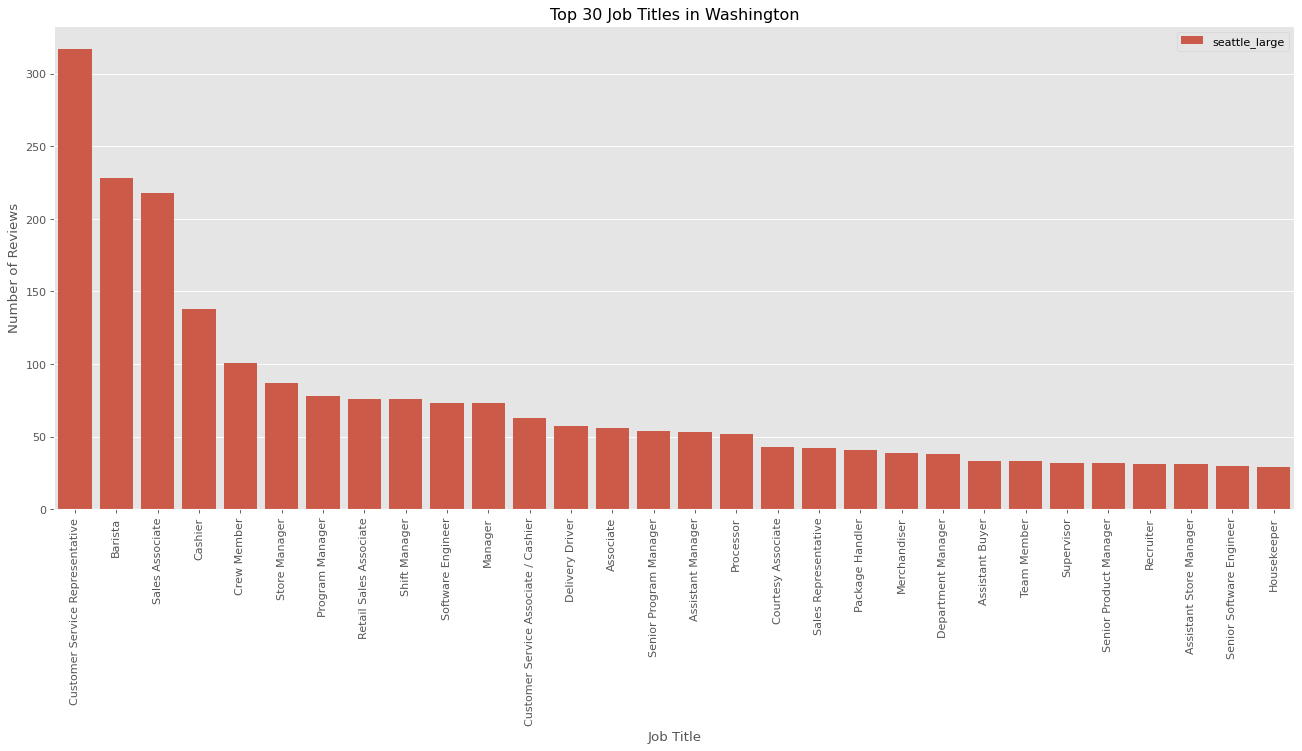

In [22]:
figure(figsize=(20,8), dpi=80)
state_df = df[df.mw_region=='seattle_large']
top_jobs = state_df.norm_job_title.value_counts()[:30].index.tolist()
job_df = state_df[state_df.norm_job_title.isin(top_jobs)]
print(job_df.shape[0])
sns.countplot(data=job_df, x='norm_job_title', hue = 'mw_region', order = top_jobs)
plt.title("Top 30 Job Titles in Washington")
plt.xlabel('Job Title')
locs, labs = plt.xticks()
plt.xticks(ticks=locs, rotation=90)
plt.ylabel('Number of Reviews')
plt.legend()

### Oregon


11935


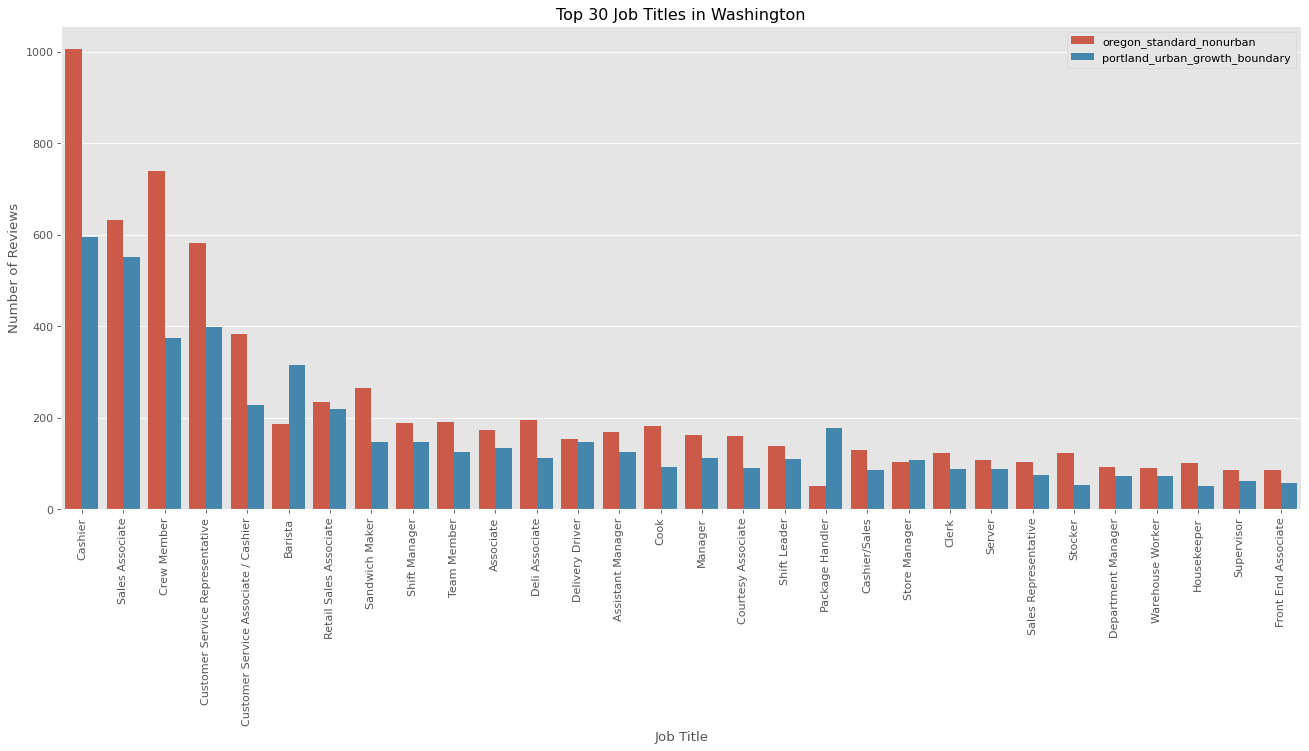

In [23]:
figure(figsize=(20,8), dpi=80)
state_df = df[df.mw_region.isin(['portland_urban_growth_boundary', 'oregon_standard_nonurban'])]#, 'washington_state'])]
top_jobs = state_df.norm_job_title.value_counts()[:30].index.tolist()
job_df = state_df[state_df.norm_job_title.isin(top_jobs)]
print(job_df.shape[0])
sns.countplot(data=job_df, x='norm_job_title', hue = 'mw_region', order = top_jobs)
plt.title("Top 30 Job Titles in Washington")
plt.xlabel('Job Title')
locs, labs = plt.xticks()
plt.xticks(ticks=locs, rotation=90)
plt.ylabel('Number of Reviews')
plt.legend()

Adding in Washington state:

31705


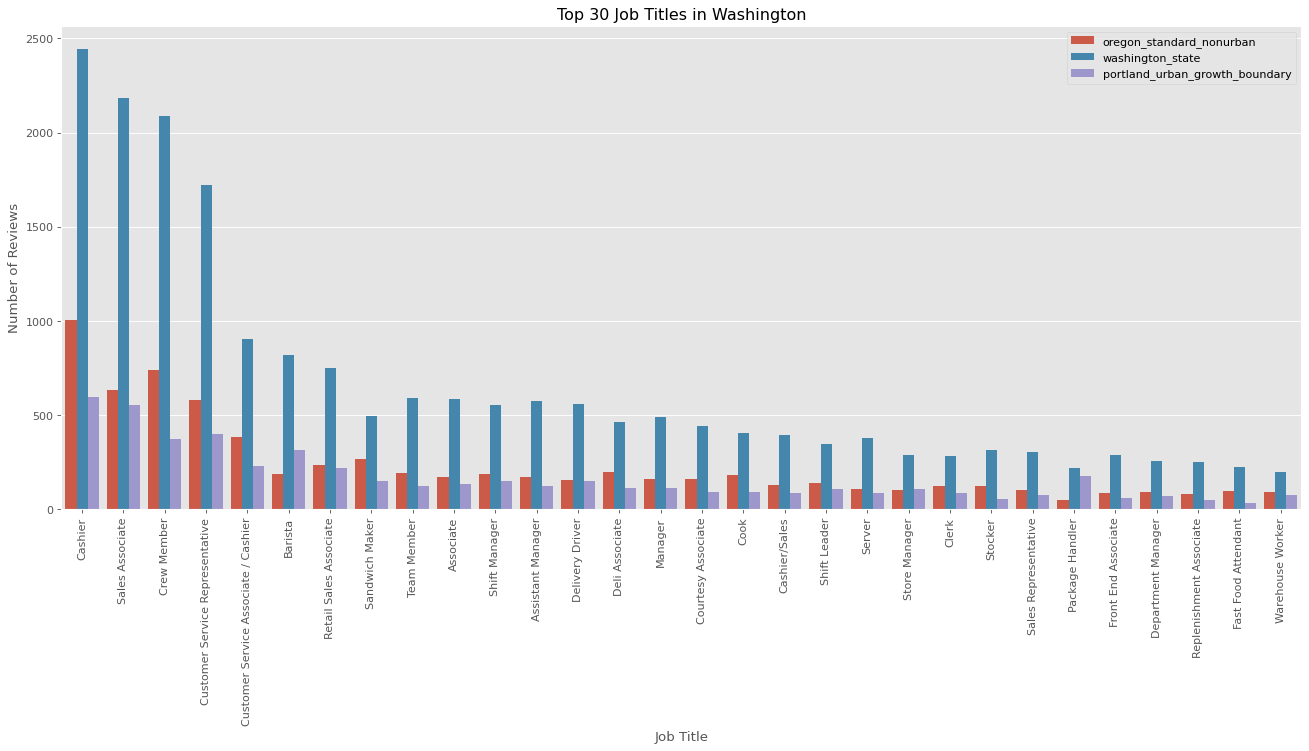

In [24]:
figure(figsize=(20,8), dpi=80)
state_df = df[df.mw_region.isin(['portland_urban_growth_boundary', 'oregon_standard_nonurban', 'washington_state'])]
top_jobs = state_df.norm_job_title.value_counts()[:30].index.tolist()
job_df = state_df[state_df.norm_job_title.isin(top_jobs)]
print(job_df.shape[0])
sns.countplot(data=job_df, x='norm_job_title', hue = 'mw_region', order = top_jobs)
plt.title("Top 30 Job Titles in Washington")
plt.xlabel('Job Title')
locs, labs = plt.xticks()
plt.xticks(ticks=locs, rotation=90)
plt.ylabel('Number of Reviews')
plt.legend()

### Illinois

48177


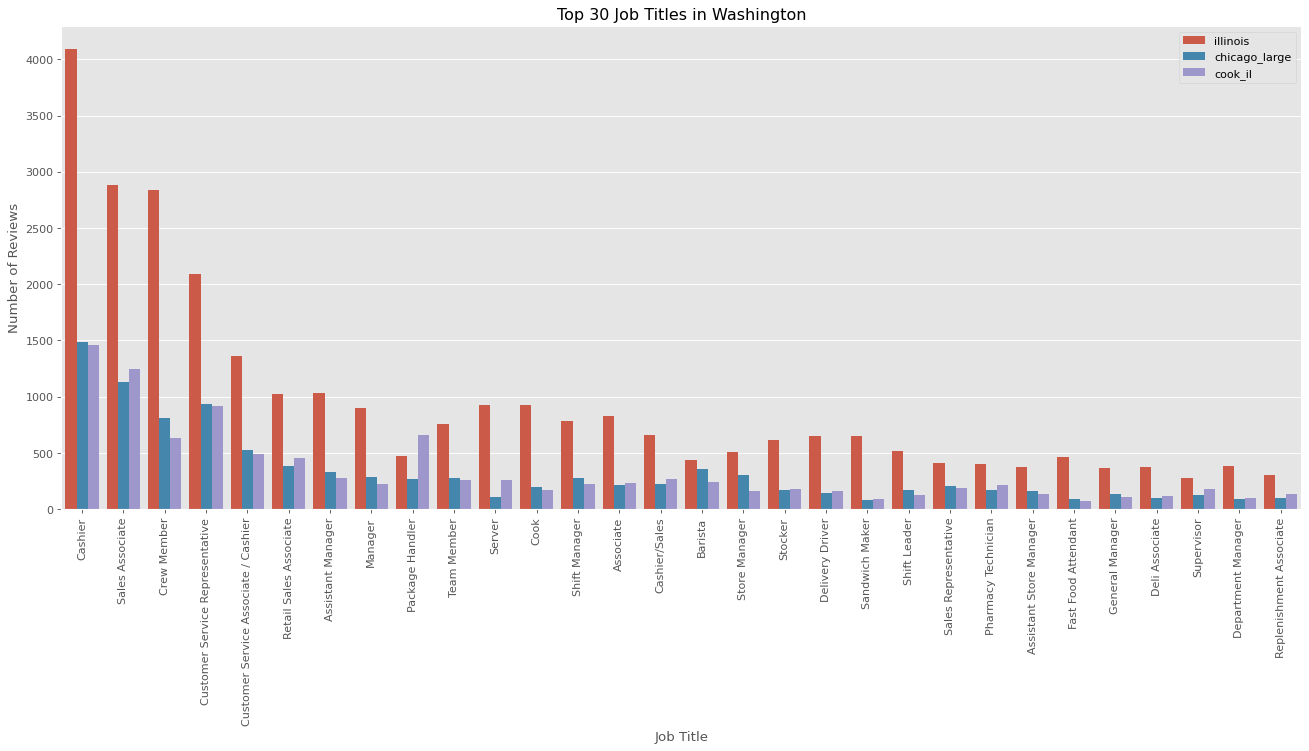

In [25]:
figure(figsize=(20,8), dpi=80)
state_df = df[df.mw_region.isin(['chicago_large', 'cook_il', 'illinois'])]
top_jobs = state_df.norm_job_title.value_counts()[:30].index.tolist()
job_df = state_df[state_df.norm_job_title.isin(top_jobs)]
print(job_df.shape[0])
sns.countplot(data=job_df, x='norm_job_title', hue = 'mw_region', order = top_jobs)
plt.title("Top 30 Job Titles in Washington")
plt.xlabel('Job Title')
locs, labs = plt.xticks()
plt.xticks(ticks=locs, rotation=90)
plt.ylabel('Number of Reviews')
plt.legend()

### Maryland & D.C. Area

59819


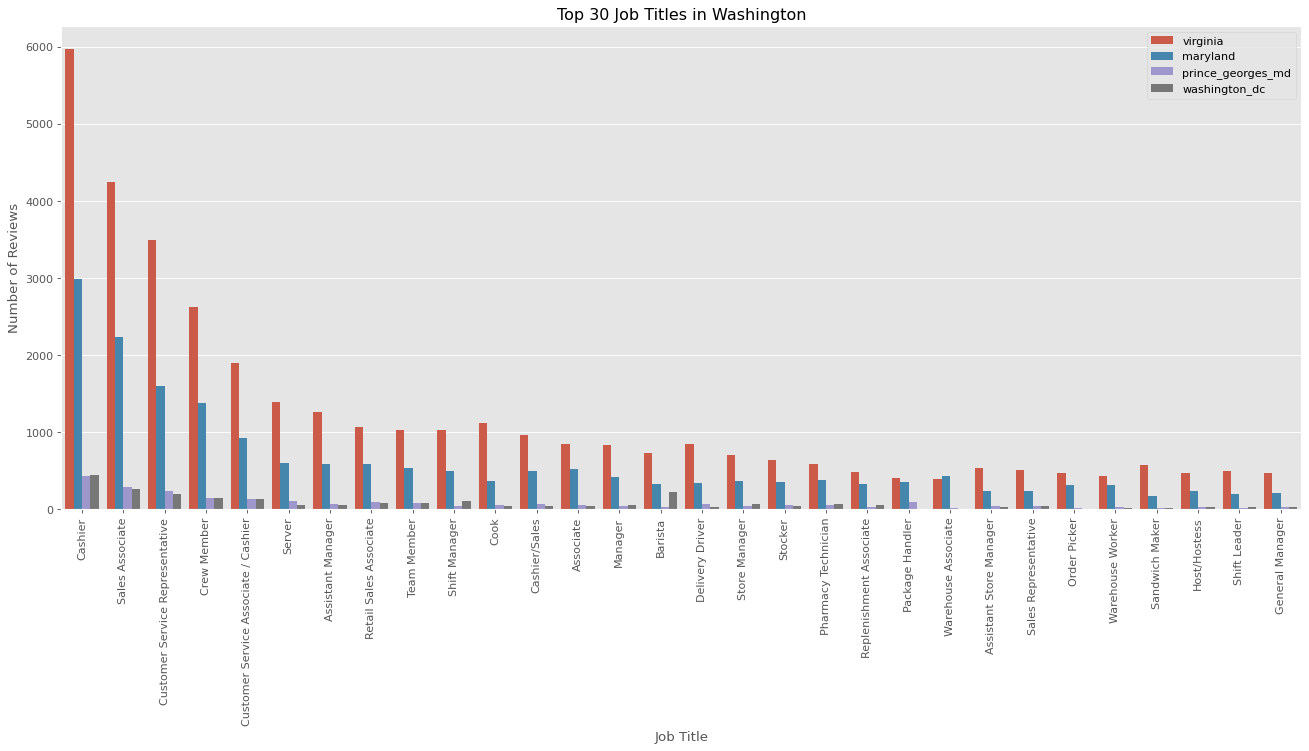

In [26]:
figure(figsize=(20,8), dpi=80)
state_df = df[df.mw_region.isin(['maryland', 'prince_georges_md', 'montgomery_md', 'washington_dc', 'virginia' ])]
top_jobs = state_df.norm_job_title.value_counts()[:30].index.tolist()
job_df = state_df[state_df.norm_job_title.isin(top_jobs)]
print(job_df.shape[0])
sns.countplot(data=job_df, x='norm_job_title', hue = 'mw_region', order = top_jobs)
plt.title("Top 30 Job Titles in Washington")
plt.xlabel('Job Title')
locs, labs = plt.xticks()
plt.xticks(ticks=locs, rotation=90)
plt.ylabel('Number of Reviews')
plt.legend()

## **Top jobs**

## **Conversation topics (by year)**

# **NOTES**

Baltimore vs DC

Equity - theme of the times

Does minimum wage work to promote equity?  Blunt instrument?

Literature review - local vs regional vs state - summary for next meeting

Urban vs Rural

# **TOPICS FOR DISCUSSION AT NEXT MEETING**



1.   Scope of MW wage paper--before pandemic?
2.   Second paper with same dataset -- impact of pandemic?

